<a href="https://colab.research.google.com/github/FadyEhab-coder/ML-Projects/blob/main/detect_ai_vs_human_generated_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Step 1: Download dataset
print("Downloading dataset...")
dataset_path = kagglehub.dataset_download("mafiosoquasar/detect-ai-vs-human-generated-images-1")
print("Dataset downloaded at:", dataset_path)

100%|██████████| 4.03G/4.03G [00:51<00:00, 83.3MB/s]

Extracting files...


Dataset downloaded at: /root/.cache/kagglehub/datasets/mafiosoquasar/detect-ai-vs-human-generated-images-1/versions/1


In [ ]:
# Step 2: Data generators with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 63960 images belonging to 2 classes.
Found 15990 images belonging to 2 classes.


In [ ]:
# Step 3: Build ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

resnet_model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Step 4: Callbacks
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy", mode="max")
early_stop = EarlyStopping(monitor="val_loss", patience=3)


In [ ]:
# Step 5: Train model
history = resnet_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.6160 - loss: 0.6531

1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1413s 700ms/step - accuracy: 0.6160 - loss: 0.6531 - val_accuracy: 0.7583 - val_loss: 0.5240
Epoch 2/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.7125 - loss: 0.5723

1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1342s 672ms/step - accuracy: 0.7125 - loss: 0.5723 - val_accuracy: 0.7662 - val_loss: 0.5393
Epoch 3/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1335s 668ms/step - accuracy: 0.7200 - loss: 0.5736 - val_accuracy: 0.7595 - val_loss: 0.5287
Epoch 4/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1317s 659ms/step - accuracy: 0.7212 - loss: 0.5660 - val_accuracy: 0.7413 - val_loss: 0.5298


In [ ]:

# Step 6: Evaluation
loss, accuracy = resnet_model.evaluate(validation_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


500/500 ━━━━━━━━━━━━━━━━━━━━ 263s 526ms/step - accuracy: 0.7448 - loss: 0.5307
Validation Loss: 0.5290
Validation Accuracy: 0.7427


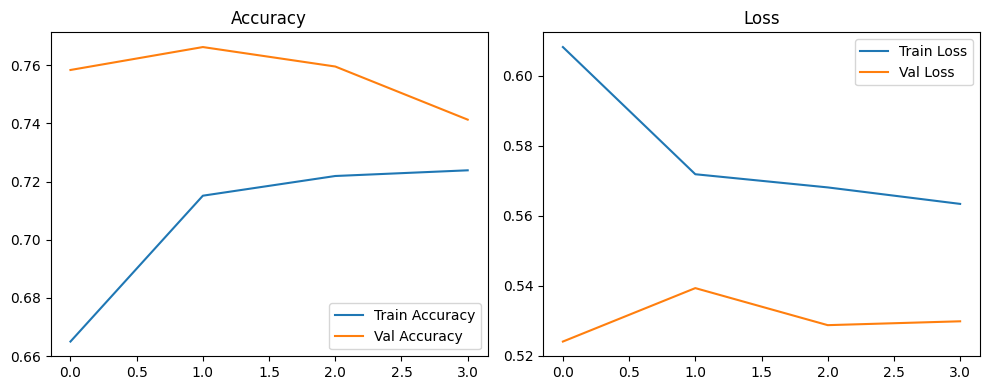

In [ ]:

# Step 7: Plot training results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()
